11493376/11490434 [==============================] - 0s 0us/step
TensorFlow:
313/313 [==============================] - 0s 930us/step - loss: 0.5742 - accuracy: 0.8765

Accuracy del model amb TensorFlow = 0.8765000104904175


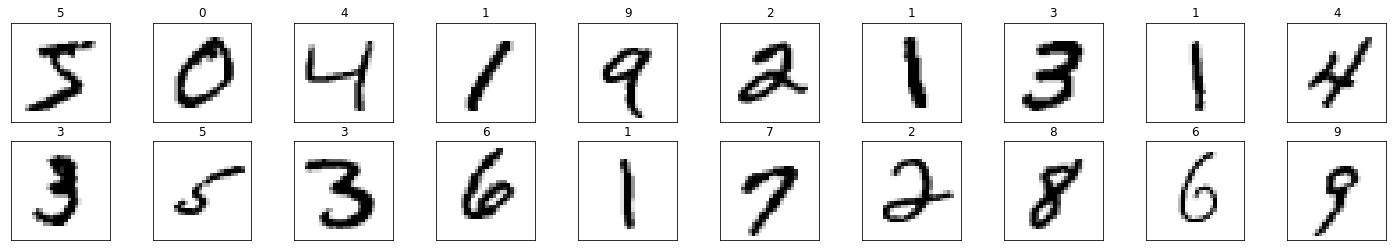

In [ ]:
# Importar las bibliotecas necesarias y definir algunos hiperparámetros que necesitaremos para el entrenamiento.
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
epochs = 10 #Numero de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation. En cada ciclo (epoch) todos los 
#datos de entrenamiento pasan por la red neuronal para que esta aprenda sobre ellos, si existen 10 ciclos y 1000 datos, cada ciclo los 1000 datos pasaran por la red neuronal.
batch_size=64 #Es el numero de datos que tiene cada iteración de un ciclo (epoch).

# Cargar y preprocesar datos
(x_trainTF_, y_trainTF_), _ = tf.keras.datasets.mnist.load_data()

x_trainTF = x_trainTF_.reshape(60000, 784).astype('float32')/255
y_trainTF = tf.keras.utils.to_categorical(y_trainTF_, num_classes=10)

# Verificamos que ambos códigos(TensorFlow y PyTorch) han cargado los mismos datos con la biblioteca matplotlib.pyplot
print("TensorFlow:")
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   ax.imshow(x_trainTF_[idx], cmap=plt.cm.binary)
   ax.set_title(str(y_trainTF_[idx]))
   
# Definimos el modelo
modelTF = tf.keras.Sequential([ tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(784,)), tf.keras.layers.Dense(10,activation='softmax')])

# Definimos el Optimizador y la Función Pérdida
modelTF.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.SGD(lr=0.01),metrics = ['accuracy'])

# Entrenamos el modelo
_ = modelTF.fit(x_trainTF, y_trainTF, epochs=epochs, batch_size=batch_size, verbose = 0)

# Evaluamos el modelo
_, (x_testTF, y_testTF)= tf.keras.datasets.mnist.load_data()
x_testTF = x_testTF.reshape(10000, 784).astype('float32')/255
y_testTF = tf.keras.utils.to_categorical(y_testTF, num_classes=10)

_ , test_accTF = modelTF.evaluate(x_testTF, y_testTF)
print('\nAccuracy del model amb TensorFlow =', test_accTF)

# Notas:
# Hyperparameters. Son los parametros que modificamos manualmente en una red neuronal.
# Forwardpropagation. Es la manera en la cual las redes neuronales crean las predicciones.
# Backpropagation. Encargado de optimizar la función de perdida para mejorar las predicciones de una red neuronal
# Lost function. Función que nos dice que tan buena es la red neuronal, un resultado alto indica que la red neuronal tiene un desempeño pobre y un resultado bajo indica que la red neuronal esta haciendo un buen trabajo.
# Cross Entropy. −(y log(p) + (1 − y)log(1 − p)). Esta función se usa para problemas de clasificación.
# Mean Squared Error. (p - y) ** 2. Esta función se usa para problemas de regresión. No utilizada en este caso.

# Nueva sección